<a href="https://colab.research.google.com/github/clento173/OpenSourceDataAnalysis_3-2/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

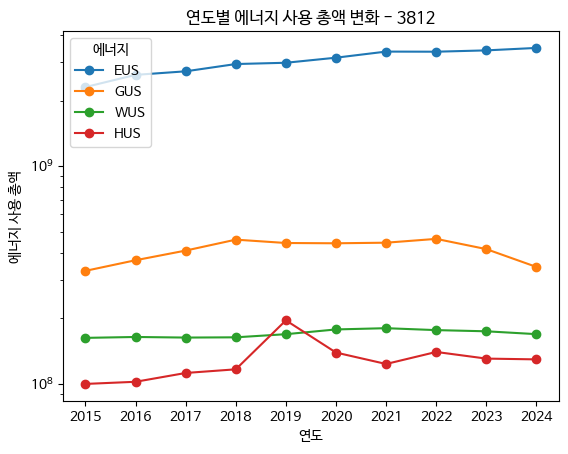

In [39]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

url = "http://openapi.seoul.go.kr:8088/4d54555a6965756e3130326d6c4c5867/json/energyUseDataSummaryInfo/1/100/"
rows = []
for year in range(2015,2025):
    for month in range(1,13):
        url_month = url + str(year) + "/" + "{:02d}".format(month)
        response = (requests.get(url_month).json())
        rows.extend(response['energyUseDataSummaryInfo']['row'])


select_col = [{'YEAR' : item['YEAR'],'MON' : item['MON'], 'EUS' : item['EUS'], 'GUS' : item['GUS'], 'WUS' : item['WUS'], 'HUS' : item['HUS']} for item in rows if item['MM_TYPE'] == '개인']

df = pd.DataFrame(select_col)

def get_season(month):
    if month in ['03', '04', '05']:
        return '봄'
    elif month in ['06', '07', '08']:
        return '여름'
    elif month in ['09', '10', '11']:
        return '가을'
    else:
        return '겨울'

df['SEASON'] = df['MON'].apply(get_season)

cols = ['EUS', 'GUS', 'WUS', 'HUS']
for col in cols:
    df[col] = df[col].astype(float)

total = df.groupby('YEAR')[cols].sum()

for col in total.columns:
    plt.plot(total.index, total[col], marker='o', label=col)

plt.title('연도별 에너지 사용 총액 변화 - 3812')
plt.xlabel('연도')
plt.ylabel('에너지 사용 총액')
plt.legend(title='에너지', loc='upper left')
plt.show()

#df['GUS'] = df['GUS'].astype(float)
#season = df.groupby('SEASON')['GUS'].sum()

#desired_order = ['봄', '여름', '가을', '겨울']
#season_series = pd.Series(season)
#season_series = season_series.reindex(desired_order)
#season_series.plot(kind='bar')

#plt.title('계절별 가스 사용량')
#plt.xlabel('계절')
#plt.ylabel('가스사용량')

#for idx, value in enumerate(season_series):
#    plt.text(idx, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

#plt.show()